<a href="https://colab.research.google.com/github/ahyen/ML-assignment/blob/master/Assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd ../content/drive/My Drive/Colab Notebooks/ML

/content/drive/My Drive/Colab Notebooks/ML


# **1. Plot the estimated parameters using training dataset**

In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt

#make list for save train data
x_train = []
y_train = []
z_train = []
h_train = []

#load train data
with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    
    ct = 1 
    for i in reader:
        x_train.append(i[0])
        y_train.append(i[1])
        z_train.append(i[2])
        h_train.append(i[3])
        ct += 1

#make list for save test data
x_test = []
y_test = []
z_test = []
h_test = []

#load test data
with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        x_test.append(i[0])
        y_test.append(i[1])
        z_test.append(i[2])
        h_test.append(i[3])
        ct += 1

#convert string to float
x_train = list(map(float, x_train))
y_train = list(map(float, y_train))
z_train = list(map(float, z_train))
h_train = list(map(float, h_train))
x_test = list(map(float, x_test))
y_test = list(map(float, y_test))
z_test = list(map(float, z_test))
h_test = list(map(float, h_test))

In [38]:
#set theta0, theta1, theta2, theta3
np.random.seed(100)
theta0 = np.random.randn(1)
theta1 = np.random.randn(1)
theta2 = np.random.randn(1)
theta3 = np.random.randn(1)

#make list for save cost, theta0, theta1, theta2 and theta3
train_cost = []
theta0_list = []
theta1_list = []
theta2_list = []
theta3_list = []

#make list for save test data's cost
test_cost = []

#set learning rate and iteration
alpha = 0.00002
iteration = 20000

for i in range(iteration):

  hypothesis = theta0 + theta1 * x_train  + theta2 * y_train + theta3 * z_train
  error = hypothesis - h_train

  #set hypothesis and error about test data
  hypothesis_test = theta0 + theta1 * x_test  + theta2 * y_test + theta3 * z_test
  error_test = hypothesis_test - h_test

  #objective function
  cost = (error ** 2).mean()
  train_cost.append(cost)

  #objective function for test data
  cost_test = (error_test ** 2).mean()
  test_cost.append(cost_test)

  #gradient descent
  theta0_grad = error.mean()
  theta1_grad = (error * x_train).mean()
  theta2_grad = (error * y_train).mean()
  theta3_grad = (error * z_train).mean()

  theta0 = theta0 - alpha * (theta0_grad)
  theta1 = theta1 - alpha * (theta1_grad)
  theta2 = theta2 - alpha * (theta2_grad)
  theta3 = theta3 - alpha * (theta3_grad)
  
  theta0_list.append(theta0)
  theta1_list.append(theta1)
  theta2_list.append(theta2)
  theta3_list.append(theta3)

#final theta0, theta1, theta2 and theta3
print(theta0, theta1, theta2, theta3)

[-1.70352931] [0.79024711] [-1.79072303] [4.00949961]


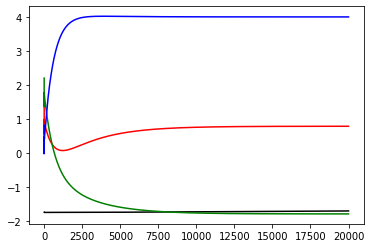

In [32]:
#plotting theta0, theta1, theta2 and theta3
plt.plot(range(0, iteration), theta0_list, 'black')
plt.plot(range(0, iteration), theta1_list,'red')
plt.plot(range(0, iteration), theta2_list,'green')
plt.plot(range(0, iteration), theta3_list,'blue')
plt.show()

# **2. Plot the training error using the training dataset**

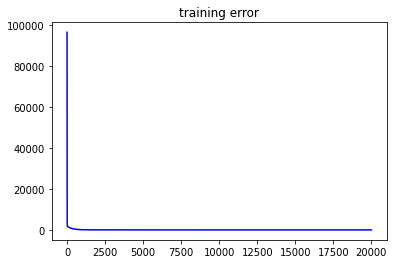

In [39]:
#plot the value of the objective function at every optimization step
plt.plot(range(0, iteration), train_cost, 'blue')
plt.title('training error')
plt.show()

# **3. Plot the testing error using the testing dataset at every iteration of gradient descent until convergence**

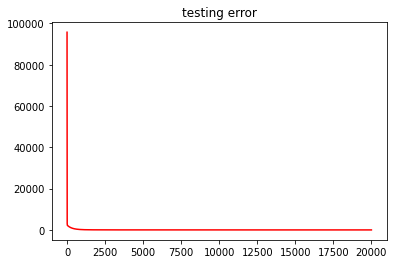

In [40]:
plt.plot(range(0, iteration), test_cost, 'red')
plt.title('testing error')
plt.show()